<a href="https://colab.research.google.com/github/fabermudez4/CursoPythonCafam/blob/main/Parcial_CursoCafam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

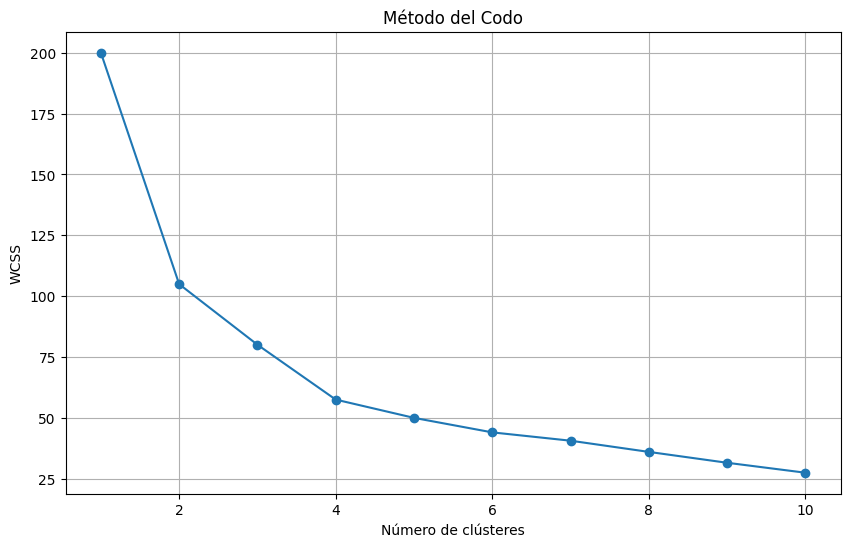

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


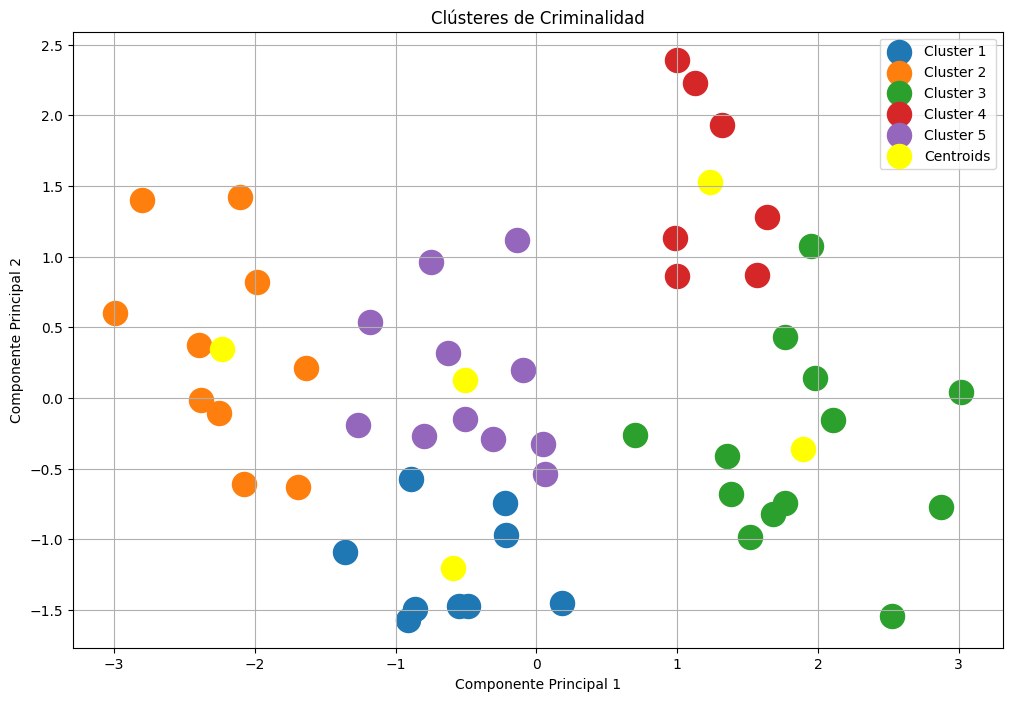

Estados con alta necesidad de profesionales capacitados:
             State  Murder  Assault
0          Alabama    13.2      236
1           Alaska    10.0      263
2          Arizona     8.1      294
3         Arkansas     8.8      190
4       California     9.0      276
5         Colorado     7.9      204
8          Florida    15.4      335
9          Georgia    17.4      211
12        Illinois    10.4      249
17       Louisiana    15.4      249
19        Maryland    11.3      300
21        Michigan    12.1      255
23     Mississippi    16.1      259
24        Missouri     9.0      178
27          Nevada    12.2      252
30      New Mexico    11.4      285
31        New York    11.1      254
32  North Carolina    13.0      337
39  South Carolina    14.4      279
41       Tennessee    13.2      188
42           Texas    12.7      201

Asignación de recursos por clúster:

Cluster 1:
  Estados: ['Connecticut', 'Hawaii', 'Massachusetts', 'New Jersey', 'Ohio', 'Pennsylvania', 'Rhode Isl

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataset = pd.read_csv('crime_data.csv')

X = dataset[['Murder', 'Assault', 'UrbanPop', 'Rape']]

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

dataset['Cluster'] = y_kmeans

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los clústeres
plt.figure(figsize=(12, 8))
for i in range(optimal_clusters):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], s=300, label=f'Cluster {i+1}')


centers_pca = pca.transform(kmeans.cluster_centers_)

plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='yellow', label='Centroids', marker='o')
plt.title('Clústeres de Criminalidad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

high_crime_states = dataset[(dataset['Murder'] > dataset['Murder'].median()) & (dataset['Assault'] > dataset['Assault'].median())]
print("Estados con alta necesidad de profesionales capacitados:")
print(high_crime_states[['State', 'Murder', 'Assault']])

total_police = 300
total_foot_policemen = 500
total_recruits = 150

cluster_sizes = dataset['Cluster'].value_counts()

resource_allocation = {}
for i in range(optimal_clusters):
    num_states = cluster_sizes[i]
    cluster_states = dataset[dataset['Cluster'] == i]

    resources = {
        'Policías Capacitados': min(total_police, max(0, total_police // optimal_clusters)),
        'Policías de a Pie': min(total_foot_policemen, max(0, total_foot_policemen // optimal_clusters)),
        'Cadetes': min(total_recruits, max(0, total_recruits // optimal_clusters))
    }

    if resources['Policías Capacitados'] > total_police:
        resources['Policías Capacitados'] = total_police
    if resources['Policías de a Pie'] > total_foot_policemen:
        resources['Policías de a Pie'] = total_foot_policemen
    if resources['Cadetes'] > total_recruits:
        resources['Cadetes'] = total_recruits

    total_police -= resources['Policías Capacitados']
    total_foot_policemen -= resources['Policías de a Pie']
    total_recruits -= resources['Cadetes']

    resource_allocation[f'Cluster {i+1}'] = {
        'States': cluster_states['State'].tolist(),
        'Policías Capacitados': resources['Policías Capacitados'],
        'Policías de a Pie': resources['Policías de a Pie'],
        'Cadetes': resources['Cadetes']
    }

print("\nAsignación de recursos por clúster:")
for cluster, allocation in resource_allocation.items():
    print(f"\n{cluster}:")
    print(f"  Estados: {allocation['States']}")
    print(f"  Policías Capacitados: {allocation['Policías Capacitados']}")
    print(f"  Policías de a Pie: {allocation['Policías de a Pie']}")
    print(f"  Cadetes: {allocation['Cadetes']}")


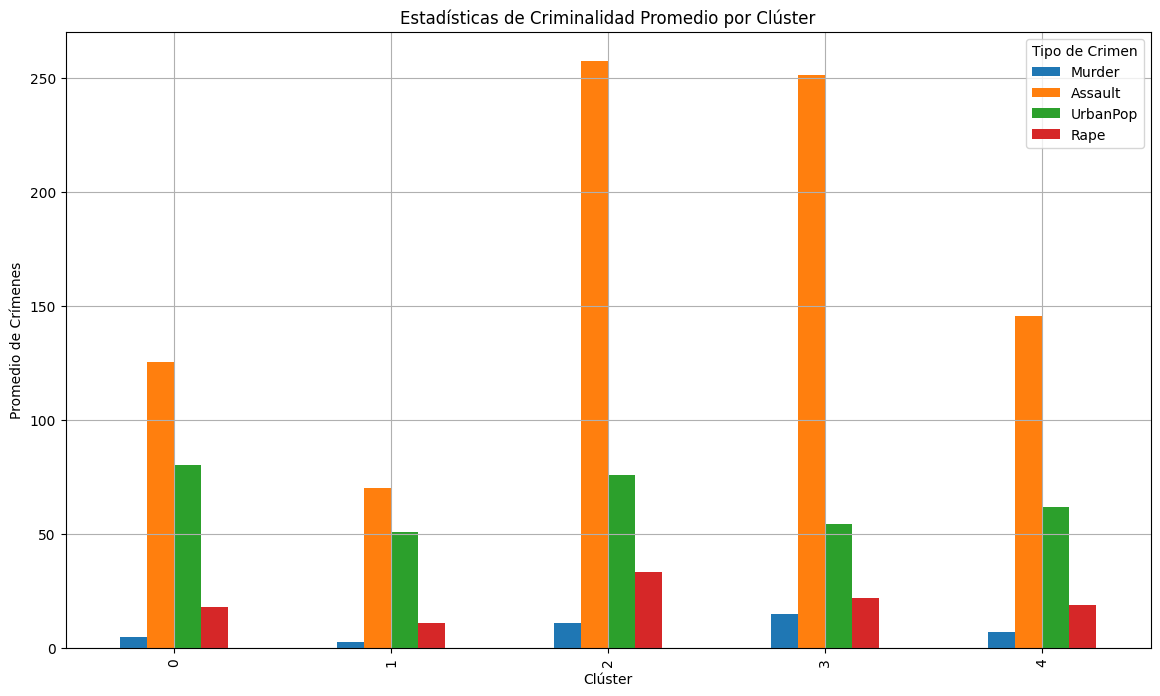

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

crime_stats = dataset.groupby('Cluster').agg({
    'Murder': 'mean',
    'Assault': 'mean',
    'UrbanPop': 'mean',
    'Rape': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

crime_stats.plot(kind='bar', x='Cluster', ax=ax)

plt.title('Estadísticas de Criminalidad Promedio por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Promedio de Crímenes')
plt.legend(title='Tipo de Crimen')
plt.grid(True)

plt.show()


1. ¿Cómo podemos agrupar los estados?

Para agrupar los estados, se utiliza el algoritmo de K-Means Clustering. Este método segmenta los estados en diferentes clústeres basados en sus características de criminalidad (Murder, Assault, UrbanPop, Rape). Donde se
Escalan las características para normalizar los datos, adicional se determina el número óptimo de clústeres usando el método del codo y por ultimo aplicar K-Means para clasificar los estados en esos clústeres.

El código utiliza el método del codo para encontrar el número óptimo de clústeres y luego aplica K-Means para asignar cada estado a un clúster específico.

2. ¿Cuáles son los estados con necesidad de profesionales con mayor capacidad de atención al crimen?

Esto se puede ver en la tabla de "Estados con alta necesidad de profesionales capacitados"

3. ¿Cómo distribuiría los recursos?

Para la distribución de recursos se calculan recursos disponibles para cada clúster dividiendo equitativamente los recursos disponibles entre los clústeres y se ajustan los recursos asignados para no exceder la cantidad total disponible.
Policías Capacitados (300 disponibles)
Policías de a Pie (500 disponibles)
Cadetes (150 disponibles)
Para cada clúster, se asigna una parte proporcional de cada tipo de recurso, y luego se ajusta si se excede el total disponible.


4. ¿Cuáles son los grupos que existen dentro del comportamiento de la criminalidad?

Los clústeres se definen por el algoritmo K-Means y se visualizan en el gráfico de dispersión de PCA. Cada clúster representa un grupo de estados con comportamientos de criminalidad similares. Los estados en el mismo clúster comparten características de criminalidad similares, lo que ayuda a identificar patrones comunes.

